In [1]:
# importing all the necessary libraries
import   numpy                   as np
import   pandas                  as pd
import   matplotlib.pyplot       as plt
import   seaborn                 as sns
import   scipy.stats             as stats
import   statsmodels.formula.api as sm

from     sklearn.tree            import DecisionTreeClassifier
from     sklearn.ensemble        import RandomForestClassifier
from     sklearn.linear_model    import LogisticRegression
from     sklearn.naive_bayes     import GaussianNB
from     sklearn.neighbors       import KNeighborsClassifier

from     sklearn.model_selection import GridSearchCV

from     sklearn.preprocessing   import StandardScaler
from     sklearn                 import model_selection
from     sklearn                 import metrics
from     scipy.stats             import zscore
from     sklearn.model_selection import train_test_split

import   warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('PL_XSELL.csv')
data.head()

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,...,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
0,C7927,0,27,M,3383.75,SELF-EMP,26-30,776,30,SA,...,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1,0.000011
1,C6877,0,47,M,287489.04,SAL,46-50,324,28,SA,...,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0,0.000111
2,C19922,0,40,M,18216.88,SELF-EMP,36-40,603,2,SA,...,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1,0.000120
3,C8183,0,53,M,71720.48,SAL,>50,196,13,CA,...,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0,0.000137
4,C12123,0,36,M,1671622.89,PROF,36-40,167,24,SA,...,0,0,0.0,808480.0,0.0,0.00,0.0,1,0,0.000174


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
CUST_ID                     20000 non-null object
TARGET                      20000 non-null int64
AGE                         20000 non-null int64
GENDER                      20000 non-null object
BALANCE                     20000 non-null float64
OCCUPATION                  20000 non-null object
AGE_BKT                     20000 non-null object
SCR                         20000 non-null int64
HOLDING_PERIOD              20000 non-null int64
ACC_TYPE                    20000 non-null object
ACC_OP_DATE                 20000 non-null object
LEN_OF_RLTN_IN_MNTH         20000 non-null int64
NO_OF_L_CR_TXNS             20000 non-null int64
NO_OF_L_DR_TXNS             20000 non-null int64
TOT_NO_OF_L_TXNS            20000 non-null int64
NO_OF_BR_CSH_WDL_DR_TXNS    20000 non-null int64
NO_OF_ATM_DR_TXNS           20000 non-null int64
NO_OF_NET_DR_TXNS           20000 non-null int64
N

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,20000.0,0.125600,0.331406,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
AGE,20000.0,38.418150,9.577985,21.000000,30.000000,38.000000,4.600000e+01,5.500000e+01
BALANCE,20000.0,511362.192118,723592.961792,0.000000,64754.025000,231675.845000,6.538768e+05,8.360431e+06
SCR,20000.0,440.150300,249.887582,100.000000,227.000000,364.000000,6.440000e+02,9.990000e+02
HOLDING_PERIOD,20000.0,14.955650,8.642634,1.000000,7.000000,15.000000,2.200000e+01,3.100000e+01
LEN_OF_RLTN_IN_MNTH,20000.0,125.239300,54.953936,29.000000,79.000000,125.000000,1.720000e+02,2.210000e+02
NO_OF_L_CR_TXNS,20000.0,12.348050,12.151921,0.000000,6.000000,10.000000,1.400000e+01,7.500000e+01
NO_OF_L_DR_TXNS,20000.0,6.633700,7.675830,0.000000,2.000000,5.000000,7.000000e+00,7.400000e+01
TOT_NO_OF_L_TXNS,20000.0,18.975400,17.759290,0.000000,9.000000,14.000000,2.100000e+01,1.490000e+02
NO_OF_BR_CSH_WDL_DR_TXNS,20000.0,1.883000,2.263596,0.000000,1.000000,1.000000,2.000000e+00,1.500000e+01


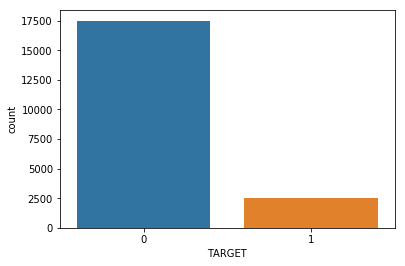

In [5]:
sns.countplot(data['TARGET'])
plt.show()

In [6]:
data.drop(['CUST_ID','random','AGE_BKT', 'ACC_OP_DATE'], axis = 1, inplace=True)

***•	Split data in Training (Development Sample) 70% and Hold-out Sample 30%***

In [7]:
data = pd.get_dummies(data)

In [8]:
x = data.drop(['TARGET'], axis=1)
y = data['TARGET']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

***•	Build CART Model in Python***

In [9]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [10]:
# Decision Tree Classifier Model

print('\n\n\nDecision Tree Classifier Accuracy Score')
dt.fit(x_train, y_train)
print('Training   : ',round(dt.score(x_train, y_train),3))
print('Testing    : ',round(dt.score(x_test, y_test),3))

y_predDT = dt.predict(x_test)
con_matrixDT = metrics.confusion_matrix(y_predDT, y_test)
print('\nConfusion Matrix for DecisionTreeClassifier Model : \n',con_matrixDT)



# Random Forest Classifier Model

print('\n\n\nRandom Forest Classifier Accuracy Score')
rf.fit(x_train, y_train)
print('Training   : ',round(rf.score(x_train, y_train),3))
print('Testing    : ',round(rf.score(x_test, y_test),3))

y_predRF = rf.predict(x_test)
con_matrixRF = metrics.confusion_matrix(y_predRF, y_test)
print('\nConfusion Matrix for RandomForestClassifier Model : \n',con_matrixRF)




Decision Tree Classifier Accuracy Score
Training   :  1.0
Testing    :  0.941

Confusion Matrix for DecisionTreeClassifier Model : 
 [[5063  158]
 [ 198  581]]



Random Forest Classifier Accuracy Score
Training   :  0.994
Testing    :  0.961

Confusion Matrix for RandomForestClassifier Model : 
 [[5248  220]
 [  13  519]]


***•	Compare the AUC and Rank Ordering performance of Python***

Area under the curve :  0.8742810668747664


(0.0, 1.0)

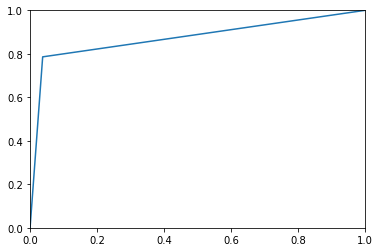

In [11]:
# DecisionTreeClassifier
fpr, tpr, _ = metrics.roc_curve(y_test,y_predDT)
roc_auc = metrics.auc(fpr,tpr)

print('Area under the curve : ',roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

In [15]:
# feature importance of DT Model

print (pd.DataFrame(dt.feature_importances_, columns = ["Imp"], index = x_train.columns))

                               Imp
AGE                       0.063698
BALANCE                   0.089363
SCR                       0.086754
HOLDING_PERIOD            0.039416
LEN_OF_RLTN_IN_MNTH       0.061826
NO_OF_L_CR_TXNS           0.042986
NO_OF_L_DR_TXNS           0.032644
TOT_NO_OF_L_TXNS          0.050454
NO_OF_BR_CSH_WDL_DR_TXNS  0.013327
NO_OF_ATM_DR_TXNS         0.008254
NO_OF_NET_DR_TXNS         0.003094
NO_OF_MOB_DR_TXNS         0.001900
NO_OF_CHQ_DR_TXNS         0.008789
FLG_HAS_CC                0.008318
AMT_ATM_DR                0.033825
AMT_BR_CSH_WDL_DR         0.040953
AMT_CHQ_DR                0.055193
AMT_NET_DR                0.038284
AMT_MOB_DR                0.015779
AMT_L_DR                  0.063841
FLG_HAS_ANY_CHGS          0.008785
AMT_OTH_BK_ATM_USG_CHGS   0.001595
AMT_MIN_BAL_NMC_CHGS      0.000000
NO_OF_IW_CHQ_BNC_TXNS     0.003313
NO_OF_OW_CHQ_BNC_TXNS     0.003875
AVG_AMT_PER_ATM_TXN       0.041170
AVG_AMT_PER_CSH_WDL_TXN   0.039247
AVG_AMT_PER_CHQ_TXN 

Area under the curve :  0.8499146964193073


(0.0, 1.0)

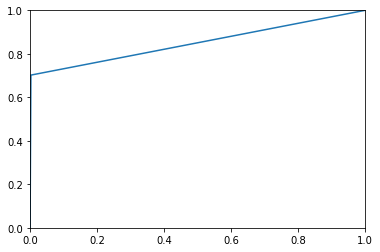

In [12]:
# RandomForestClassifier
fpr, tpr, _ = metrics.roc_curve(y_test,y_predRF)
roc_auc = metrics.auc(fpr,tpr)

print('Area under the curve : ',roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

In [16]:
# feature importance of RF Model

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = x_train.columns))

                               Imp
AGE                       0.043689
BALANCE                   0.064700
SCR                       0.060039
HOLDING_PERIOD            0.055509
LEN_OF_RLTN_IN_MNTH       0.055886
NO_OF_L_CR_TXNS           0.046506
NO_OF_L_DR_TXNS           0.026275
TOT_NO_OF_L_TXNS          0.051140
NO_OF_BR_CSH_WDL_DR_TXNS  0.024071
NO_OF_ATM_DR_TXNS         0.010865
NO_OF_NET_DR_TXNS         0.009251
NO_OF_MOB_DR_TXNS         0.003283
NO_OF_CHQ_DR_TXNS         0.018752
FLG_HAS_CC                0.014492
AMT_ATM_DR                0.045748
AMT_BR_CSH_WDL_DR         0.045445
AMT_CHQ_DR                0.040861
AMT_NET_DR                0.034693
AMT_MOB_DR                0.020133
AMT_L_DR                  0.059215
FLG_HAS_ANY_CHGS          0.006056
AMT_OTH_BK_ATM_USG_CHGS   0.000586
AMT_MIN_BAL_NMC_CHGS      0.001087
NO_OF_IW_CHQ_BNC_TXNS     0.003018
NO_OF_OW_CHQ_BNC_TXNS     0.003950
AVG_AMT_PER_ATM_TXN       0.043125
AVG_AMT_PER_CSH_WDL_TXN   0.044840
AVG_AMT_PER_CHQ_TXN 